In [1]:
import xarray as xr
from xgcm.grid import Grid
import numpy as np
import matplotlib.pyplot as plt

In [2]:
unfiltered_eta_ds = xr.open_zarr('/swot/SUM02/spencer/daily_filt/unfiltered_eta_nom.zarr')
eta_mean = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_mean.zarr')

filtered_eta_ds = xr.open_zarr('/swot/SUM02/spencer/daily_filt/filtered_eta_nom.zarr')
unfiltered_vel_ds = xr.open_zarr('/swot/SUM02/spencer/daily_filt/unfiltered_vels.zarr')
filtered_vel_ds = xr.open_zarr('/swot/SUM02/spencer/daily_filt/filtered_vels.zarr')

uvel_eul = xr.open_zarr('/swot/SUM01/spencer/swot_agulhas_surf/uvel_centered.zarr').sel(k=0)
vvel_eul = xr.open_zarr('/swot/SUM01/spencer/swot_agulhas_surf/vvel_centered.zarr').sel(k=0)

In [3]:
YC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/YC.data', dtype='>f4')
#filter the eulerian vels
f = 2*2*np.pi/24/3600*np.sin(YC.reshape(2160,2160)[:,0]*np.pi/180)
def lanczos(x, a):
    return np.sinc(x/a)
def sinc2(x, a):
    return np.sinc(x/a)

window_width=72
weight = xr.DataArray(sinc2(np.expand_dims(np.arange(-window_width/2,window_width/2),1),np.expand_dims(np.pi/f/3600,0)), dims=['window','j'])
#weight = xr.DataArray(sinc2(np.arange(-window_width/2,window_width/2), window_width/2), dims=['window'])]
nofiles=1700
u_eul_filtered = uvel_eul.U.chunk({'time':-1}).rolling(time=window_width, center=True).construct('window').dot(weight,dims='window')/weight.sum('window')
v_eul_filtered = vvel_eul.V.chunk({'time':-1}).rolling(time=window_width, center=True).construct('window').dot(weight,dims='window')/weight.sum('window')
u_eul_filtered = u_eul_filtered.isel(time=slice(43,43+nofiles)).assign_coords({'time':np.arange(0,nofiles)*3600})
v_eul_filtered = v_eul_filtered.isel(time=slice(43,43+nofiles)).assign_coords({'time':np.arange(0,nofiles)*3600})

In [4]:
unfiltered_eta = unfiltered_eta_ds.eta+eta_mean.Eta
filtered_eta = filtered_eta_ds.eta+eta_mean.Eta

unfiltered_u = unfiltered_vel_ds.u.isel(time=slice(1,2000))
unfiltered_v = unfiltered_vel_ds.v.isel(time=slice(1,2000))

filtered_u = filtered_vel_ds.u.isel(time=slice(1,2000))
filtered_v = filtered_vel_ds.v.isel(time=slice(1,2000))

eulfiltered_u = u_eul_filtered.isel(time=slice(1,1700,24)).drop_vars('time')
eulfiltered_v = v_eul_filtered.isel(time=slice(1,1700,24)).drop_vars('time')

In [5]:
#don't run usually
#qiu_dataset = unfiltered_u.to_dataset(name='unfiltered_u')
#qiu_dataset = qiu_dataset.merge(unfiltered_v.rename('unfiltered_v'))
#qiu_dataset = qiu_dataset.merge(filtered_u.rename('lagfiltered_u'))
#qiu_dataset = qiu_dataset.merge(filtered_v.rename('lagfiltered_v'))
#qiu_dataset = qiu_dataset.merge(eulfiltered_u.isel(time=slice(0,70)).rename('eulfiltered_u'))
#qiu_dataset = qiu_dataset.merge(eulfiltered_v.isel(time=slice(0,70)).rename('eulfiltered_v'))

In [6]:
#don't run usually
#DXG =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/DXG.data', dtype='>f4').reshape(2160,2160)
#DYG =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/DYG.data', dtype='>f4').reshape(2160,2160)
#DXC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/DXC.data', dtype='>f4').reshape(2160,2160)
#DYC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/DYC.data', dtype='>f4').reshape(2160,2160)
#XC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/XC.data', dtype='>f4').reshape(2160,2160)
#YC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/YC.data', dtype='>f4').reshape(2160,2160)
#XG =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/XG.data', dtype='>f4').reshape(2160,2160)
#YG =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/YG.data', dtype='>f4').reshape(2160,2160)
#RAC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/RAC.data', dtype='>f4').reshape(2160,2160)
#hFacC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/hFacC.data', dtype='>f4').reshape(-1,2160,2160)[0,:,:]

In [7]:
#don't run usually
#qiu_dataset = qiu_dataset.assign_coords(DXG=(["j_g","i"], DXG))
#qiu_dataset = qiu_dataset.assign_coords(DYG=(["j","i_g"], DYG))
#qiu_dataset = qiu_dataset.assign_coords(DXC=(["j","i_g"], DXC))
#qiu_dataset = qiu_dataset.assign_coords(DYC=(["j_g","i"], DYC))
#qiu_dataset = qiu_dataset.assign_coords(XC=(["j","i"], XC))
#qiu_dataset = qiu_dataset.assign_coords(YC=(["j","i"], YC))
#qiu_dataset = qiu_dataset.assign_coords(XG=(["j_g","i_g"], XG))
#qiu_dataset = qiu_dataset.assign_coords(YG=(["j_g","i_g"], YG))
#qiu_dataset = qiu_dataset.assign_coords(RAC=(["j","i"], RAC))
#qiu_dataset = qiu_dataset.assign_coords(hFacC=(["j","i"], np.squeeze(hFacC)))

In [8]:
#don't run usually
#qiu_dataset.chunk({"time": 1, "i": 180,"j":180}).to_zarr('/swot/SUM02/spencer/for_qiyu/Raw_eul_lag_surf_vels.zarr')

In [5]:
qiyu_dataset = xr.open_zarr('/swot/SUM02/spencer/for_qiyu/Raw_eul_lag_surf_vels.zarr')

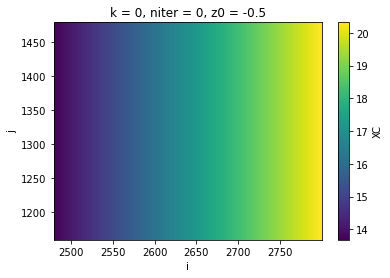

In [79]:
qiyu_dataset.isel(i=slice(1400,1400+320),j=slice(1160,1160+320)).XC.plot()

In [62]:
qiyu_dataset.isel(i=slice(920,-920),j=slice(920,-920))

<xarray.Dataset>
Dimensions:        (i: 320, i_g: 2160, j: 320, j_g: 2160, time: 70)
Coordinates: (12/20)
    DXC            (j, i_g) float32 dask.array<chunksize=(160, 2160), meta=np.ndarray>
    DXG            (j_g, i) float32 dask.array<chunksize=(2160, 160), meta=np.ndarray>
    DYC            (j_g, i) float32 dask.array<chunksize=(2160, 160), meta=np.ndarray>
    DYG            (j, i_g) float32 dask.array<chunksize=(160, 2160), meta=np.ndarray>
    RAC            (j, i) float32 dask.array<chunksize=(160, 160), meta=np.ndarray>
    XC             (j, i) float32 dask.array<chunksize=(160, 160), meta=np.ndarray>
    ...             ...
  * time           (time) int64 0 86400 172800 ... 5788800 5875200 5961600
    x              (j, i) float32 dask.array<chunksize=(160, 160), meta=np.ndarray>
    x0             (i) float64 dask.array<chunksize=(160,), meta=np.ndarray>
    y              (j, i) float32 dask.array<chunksize=(160, 160), meta=np.ndarray>
    y0             (j) float64 dask.array<chunksize=(160,), meta=np.ndarray>
    z0             float64 ...
Dimensions without coordinates: i_g, j_g
Data variables:
    eulfiltered_u  (time, j, i) float64 dask.array<chunksize=(1, 160, 160), meta=np.ndarray>
    eulfiltered_v  (time, j, i) float64 dask.array<chunksize=(1, 160, 160), meta=np.ndarray>
    lagfiltered_u  (time, i, j) float64 dask.array<chunksize=(1, 160, 160), meta=np.ndarray>
    lagfiltered_v  (time, i, j) float64 dask.array<chunksize=(1, 160, 160), meta=np.ndarray>
    unfiltered_u   (time, i, j) float64 dask.array<chunksize=(1, 160, 160), meta=np.ndarray>
    unfiltered_v   (time, i, j) float64 dask.array<chunksize=(1, 160, 160), meta=np.ndarray>

In [6]:
eulfiltered_u = qiyu_dataset.eulfiltered_u
eulfiltered_v = qiyu_dataset.eulfiltered_v

In [10]:

f = 2*2*np.pi/24/3600*np.sin(YC.reshape(2160,2160)*np.pi/180)
f_array = (xr.DataArray(f,dims=['j','i']).assign_coords(i=unfiltered_eta.i,j=unfiltered_eta.j))

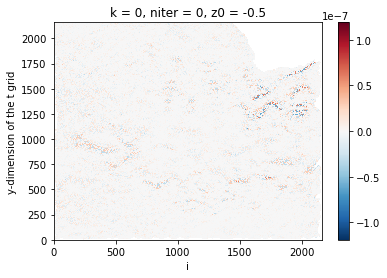

In [11]:
(uvel_eul.U.isel(time=43)-unfiltered_vel_ds.u.isel(time=1)).plot()

In [12]:
grid = Grid(unfiltered_vel_ds, coords={'X': {'center': 'i', 'left': 'i_g'}, 'Y': {'center': 'j', 'left': 'j_g'}})

In [13]:
DXC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/DXC.data', dtype='>f4')
DYC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/DYC.data', dtype='>f4')
DXC_array = (xr.DataArray(DXC.reshape(2160,2160),dims=['j','i']).assign_coords(i=unfiltered_eta.i,j=unfiltered_eta.j))
DYC_array = (xr.DataArray(DYC.reshape(2160,2160),dims=['j','i']).assign_coords(i=unfiltered_eta.i,j=unfiltered_eta.j))

In [14]:
g=9.81

u_g = (-g/f*grid.interp(grid.diff(unfiltered_eta,'Y'),'Y')/DYC_array).isel(time=slice(1,2000))
v_g = (g/f*grid.interp(grid.diff(unfiltered_eta,'X'),'X')/DXC_array).isel(time=slice(1,2000))

ufilt_g = (-g/f*grid.interp(grid.diff(filtered_eta,'Y'),'Y')/DYC_array).isel(time=slice(1,2000))
vfilt_g = (g/f*grid.interp(grid.diff(filtered_eta,'X'),'X')/DXC_array).isel(time=slice(1,2000))

In [15]:
last_time = 70
unfiltered_speed = (unfiltered_u.isel(time=slice(0,last_time))**2 
                    + unfiltered_v.isel(time=slice(0,last_time))**2)**0.5

filtered_speed = (filtered_u.isel(time=slice(0,last_time))**2 
                    + filtered_v.isel(time=slice(0,last_time))**2)**0.5

eulfiltered_speed = (eulfiltered_u.isel(time=slice(0,last_time))**2 
                    + eulfiltered_v.isel(time=slice(0,last_time))**2)**0.5

geostrophic_speed = (u_g.isel(time=slice(0,last_time))**2 
                    + v_g.isel(time=slice(0,last_time))**2)**0.5

unfiltered_minus_g = unfiltered_speed - geostrophic_speed
filtered_minus_g = filtered_speed - geostrophic_speed

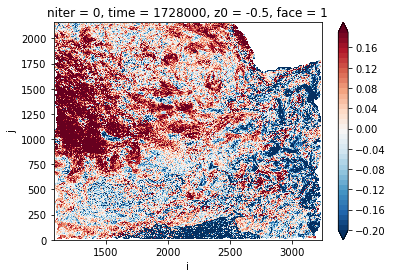

In [16]:
filtered_minus_g.isel(time=20).plot(x='i',y='j',levels=np.arange(-0.2,0.2,0.01))

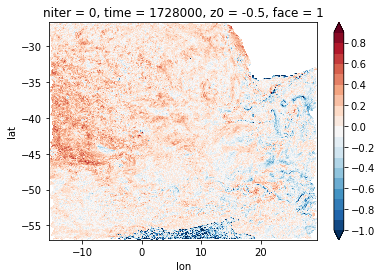

In [17]:
XC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/XC.data', dtype='>f4').reshape(2160,2160)
YC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/YC.data', dtype='>f4').reshape(2160,2160)
unfiltered_speed = unfiltered_speed.assign_coords(lon=("i", XC[0,:]),lat=("j", YC[:,0]))
filtered_speed = filtered_speed.assign_coords(lon=("i", XC[0,:]),lat=("j", YC[:,0]))
unfiltered_minus_g = unfiltered_minus_g.assign_coords(lon=("i", XC[0,:]),lat=("j", YC[:,0]))
unfiltered_minus_g.isel(time=20).plot(x='lon',y='lat',levels=np.arange(-1,1,0.1))

Text(0.5, 1.0, 'Lagrangian filtered speed, time = 1.00days')

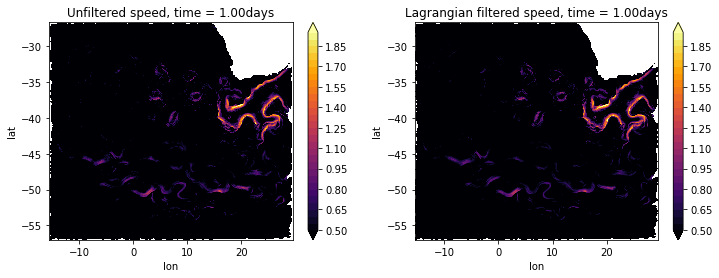

In [30]:
plt.figure(figsize=(12,4))
from matplotlib.colors import LogNorm
tt=1
plt.clf()
    
plt.subplot(121)
unfiltered_speed.isel(time=tt).plot.pcolormesh(x='lon',y='lat',levels=np.arange(0.5,2,0.05),cmap='inferno')
plt.title('Unfiltered speed, time = ' + '{0:.2f}'.format((unfiltered_speed.time.values[tt]-unfiltered_speed.time.values[0])/3600/24)+ 'days')
    
plt.subplot(122)
filtered_speed.isel(time=tt).plot.pcolormesh(x='lon',y='lat',levels=np.arange(0.5,2,0.05),cmap='inferno')
plt.title('Lagrangian filtered speed, time = ' + '{0:.2f}'.format((unfiltered_speed.time.values[tt]-unfiltered_speed.time.values[0])/3600/24)+ 'days')

In [41]:
#ffmpeg -r 60 -f image2 -i fig%03d.jpg -vcodec libx264 -crf 25 -pix_fmt yuv420p vel.mp4

for tt in range(0,70):
    plt.figure(figsize=(9,3.75))
    
    plt.subplot(121)
    unfiltered_speed.isel(time=tt).plot.pcolormesh(x='lon',y='lat',levels=np.arange(0,1,0.05),cmap='inferno')
    plt.title('Unfiltered speed, time = ' + '{0:.1f}'.format((unfiltered_speed.time.values[tt]-unfiltered_speed.time.values[0])/3600/24)+ 'days')
    
    plt.subplot(122)
    filtered_speed.isel(time=tt).plot.pcolormesh(x='lon',y='lat',levels=np.arange(0,1,0.05),cmap='inferno')
    plt.title('Lagrangian filtered speed, time = ' + '{0:.1f}'.format((unfiltered_speed.time.values[tt]-unfiltered_speed.time.values[0])/3600/24)+ 'days')
    plt.tight_layout()
    fig = plt.gcf()
    fig.savefig("/home/spencerj/agulhas-offline/movie/vel/fig{:03d}.jpg".format(tt),dpi=200)
    plt.close(fig) 

In [18]:
last_time = 70
rms_unfiltered = ((((unfiltered_speed.isel(time=slice(0,last_time)) -
            geostrophic_speed.isel(time=slice(0,last_time)))**2).mean('time'))**0.5).load()

rms_filtered = ((((filtered_speed.isel(time=slice(0,last_time)) -
            geostrophic_speed.isel(time=slice(0,last_time)))**2).mean('time'))**0.5).load()

rms_eulfiltered = ((((eulfiltered_speed.isel(time=slice(0,last_time)) -
            geostrophic_speed.isel(time=slice(0,last_time)))**2).mean('time'))**0.5).load()

/home/spencerj/.conda/envs/pangeo1/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/spencerj/.conda/envs/pangeo1/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/spencerj/.conda/envs/pangeo1/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [19]:

rms_unfiltered = rms_unfiltered.assign_coords(lon=("i", XC[0,:]),lat=("j", YC[:,0]))
rms_filtered = rms_filtered.assign_coords(lon=("i", XC[0,:]),lat=("j", YC[:,0]))
rms_eulfiltered = rms_eulfiltered.assign_coords(lon=("i", XC[0,:]),lat=("j", YC[:,0]))

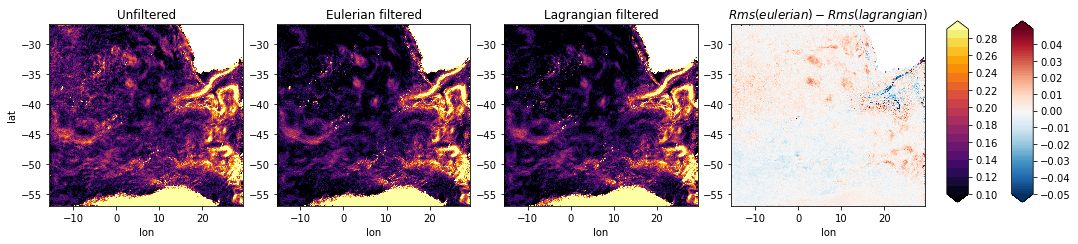

In [22]:
plt.rcParams.update({'font.size': 10})

plt.figure(figsize=(15,3.5))

plt.subplot(141)
rms_unfiltered.plot.pcolormesh(x='lon',y='lat',levels=np.arange(0.1,0.3,0.01),add_colorbar=False, cmap='inferno')
plt.title('Unfiltered')
plt.xlabel('lon')
plt.ylabel('lat')

plt.subplot(142)
rms_eulfiltered.plot.pcolormesh(x='lon',y='lat',levels=np.arange(0.1,0.3,0.01),add_colorbar=False, cmap='inferno')
plt.title('Eulerian filtered')
plt.xlabel('lon')
plt.ylabel('')

plt.subplot(143)
cs = rms_filtered.plot.pcolormesh(x='lon',y='lat',levels=np.arange(0.1,0.3,0.01),add_colorbar=False, cmap='inferno')
plt.title('Lagrangian filtered')
plt.xlabel('lon')
plt.ylabel('')

plt.subplot(144)
cs2 = (rms_eulfiltered - rms_filtered).plot.pcolormesh(x='lon',y='lat',levels=np.arange(-0.05,0.05,0.001),add_colorbar=False)
plt.title('$Rms(eulerian) - Rms(lagrangian)$')
plt.xlabel('lon')
plt.ylabel('')


fig=plt.gcf()
plt.tight_layout()
fig.subplots_adjust(right=0.86)
cbar_ax = fig.add_axes([0.88, 0.18, 0.02, 0.72])
fig.colorbar(cs, cax=cbar_ax,extend='both')

cbar_ax2 = fig.add_axes([0.94, 0.18, 0.02, 0.72])
fig.colorbar(cs2, cax=cbar_ax2,extend='both')

fig = plt.gcf()
fig.savefig("rms_geostrophy_speed.png",dpi=200)

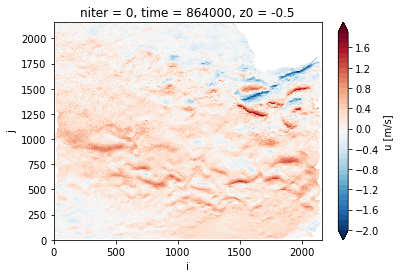

In [38]:
unfiltered_u.isel(time=10).plot(x='i',levels=np.arange(-2,2,0.1))

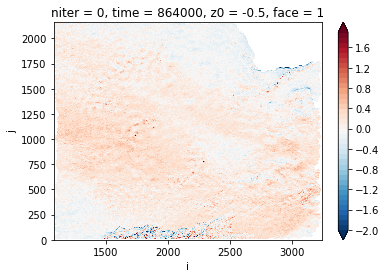

In [39]:
(unfiltered_u.isel(time=slice(0,20))-u_g.isel(time=slice(0,20))).isel(time=10).plot(x='i',levels=np.arange(-2,2,0.1))

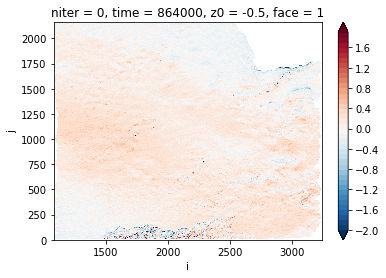

In [40]:
(filtered_u-u_g).isel(time=10).plot(x='i',levels=np.arange(-2,2,0.1))

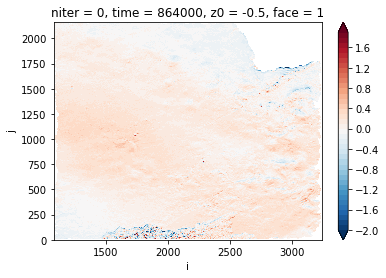

In [79]:
(filtered_u-ufilt_g).isel(time=10).plot(x='i',levels=np.arange(-2,2,0.1))

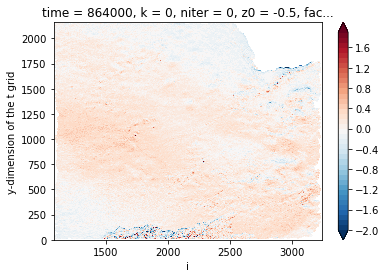

In [41]:
(eulfiltered_u.isel(time=slice(0,19))-u_g.isel(time=slice(0,19))
).isel(time=10).plot(x='i',levels=np.arange(-2,2,0.1))

In [61]:
rms_unfiltered = ((((unfiltered_u.isel(time=slice(0,last_time),i=slice(850,-850),j=slice(920,-920)) -
            u_g.isel(time=slice(0,last_time),i=slice(850,-850),j=slice(920,-920)))**2).mean('time'))**0.5)

rms_filtered = ((((filtered_u.isel(time=slice(0,last_time),i=slice(850,-850),j=slice(920,-920)) -
            u_g.isel(time=slice(0,last_time),i=slice(850,-850),j=slice(920,-920)))**2).mean('time'))**0.5)

rms_eulfiltered = ((((eulfiltered_u.isel(time=slice(0,last_time),i=slice(850,-850),j=slice(920,-920)) -
            u_g.isel(time=slice(0,last_time),i=slice(850,-850),j=slice(920,-920)))**2).mean('time'))**0.5)

In [83]:
last_time = 70
rms_unfiltered = ((((unfiltered_u.isel(time=slice(0,last_time)) -
            u_g.isel(time=slice(0,last_time)))**2).mean('time'))**0.5).load()

rms_filtered = ((((filtered_u.isel(time=slice(0,last_time)) -
            u_g.isel(time=slice(0,last_time)))**2).mean('time'))**0.5).load()

rms_eulfiltered = ((((eulfiltered_u.isel(time=slice(0,last_time)) -
            u_g.isel(time=slice(0,last_time)))**2).mean('time'))**0.5).load()

/home/spencerj/.conda/envs/pangeo1/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/spencerj/.conda/envs/pangeo1/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/spencerj/.conda/envs/pangeo1/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [84]:
rms_unfiltered2 = ((((unfiltered_u.isel(time=slice(0,last_time)) -
            ufilt_g.isel(time=slice(0,last_time)))**2).mean('time'))**0.5).load()

rms_filtered2 = ((((filtered_u.isel(time=slice(0,last_time)) -
            ufilt_g.isel(time=slice(0,last_time)))**2).mean('time'))**0.5).load()

rms_eulfiltered2 = ((((eulfiltered_u.isel(time=slice(0,last_time)) -
            ufilt_g.isel(time=slice(0,last_time)))**2).mean('time'))**0.5).load()

/home/spencerj/.conda/envs/pangeo1/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/spencerj/.conda/envs/pangeo1/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/spencerj/.conda/envs/pangeo1/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


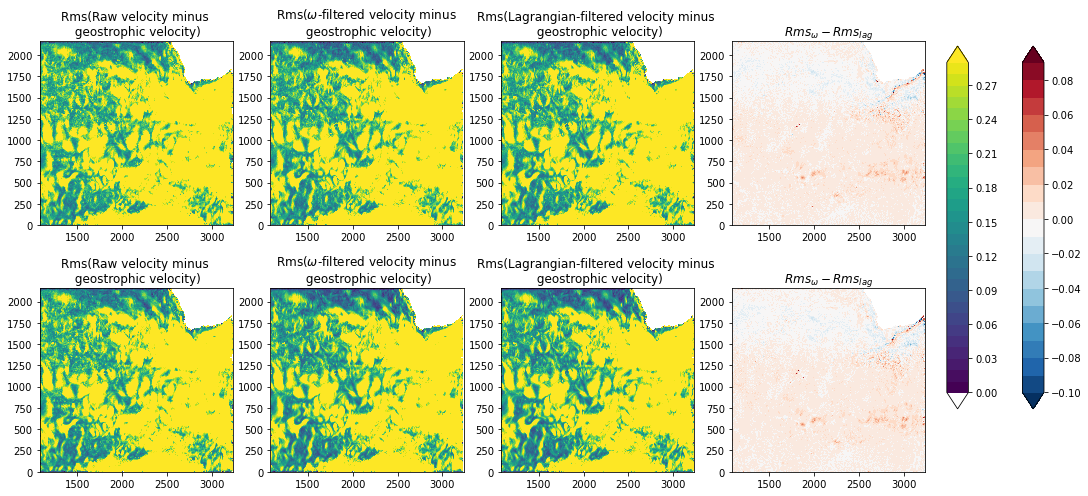

In [128]:
plt.rcParams.update({'font.size': 10})

plt.figure(figsize=(15,7))

plt.subplot(241)
rms_unfiltered.plot(x='i',levels=np.arange(0,0.3,0.01),add_colorbar=False)
plt.title('Rms(Raw velocity minus \n geostrophic velocity)')
plt.xlabel('')
plt.ylabel('')

plt.subplot(242)
rms_eulfiltered.plot(x='i',levels=np.arange(0,0.3,0.01),add_colorbar=False)
plt.title('Rms($\omega$-filtered velocity minus \n geostrophic velocity)')
plt.xlabel('')
plt.ylabel('')

plt.subplot(243)
rms_filtered.plot(x='i',levels=np.arange(0,0.3,0.01),add_colorbar=False)
plt.title('Rms(Lagrangian-filtered velocity minus \n geostrophic velocity)')
plt.xlabel('')
plt.ylabel('')

plt.subplot(244)
cs = (rms_eulfiltered - rms_filtered).plot(x='i',levels=np.arange(-0.1,0.1,0.01),add_colorbar=False)
plt.title('$Rms_{\omega} - Rms_{lag}$')
plt.xlabel('')
plt.ylabel('')

plt.subplot(245)
rms_unfiltered2.plot(x='i',levels=np.arange(0,0.3,0.01),add_colorbar=False)
plt.title('Rms(Raw velocity minus \n geostrophic velocity)')
plt.xlabel('')
plt.ylabel('')

plt.subplot(246)
rms_eulfiltered2.plot(x='i',levels=np.arange(0,0.3,0.01),add_colorbar=False)
plt.title('Rms($\omega$-filtered velocity minus \n geostrophic velocity)')
plt.xlabel('')
plt.ylabel('')

plt.subplot(247)
cs = rms_filtered2.plot(x='i',levels=np.arange(0,0.3,0.01),add_colorbar=False)
plt.title('Rms(Lagrangian-filtered velocity minus \n geostrophic velocity)')
plt.xlabel('')
plt.ylabel('')

plt.subplot(248)
cs2 = (rms_eulfiltered2 - rms_filtered2).plot(x='i',levels=np.arange(-0.1,0.1,0.01),add_colorbar=False)
plt.title('$Rms_{\omega} - Rms_{lag}$')
plt.xlabel('')
plt.ylabel('')

fig=plt.gcf()
plt.tight_layout()
fig.subplots_adjust(right=0.86)
cbar_ax = fig.add_axes([0.88, 0.18, 0.02, 0.72])
fig.colorbar(cs, cax=cbar_ax,extend='both')

cbar_ax2 = fig.add_axes([0.95, 0.18, 0.02, 0.72])
fig.colorbar(cs2, cax=cbar_ax2,extend='both')
fig = plt.gcf()
fig.savefig("rms_geostrophy.png")

In [18]:
last_time = 70
rms_unfiltered = ((((unfiltered_v.isel(time=slice(0,last_time)) -
            v_g.isel(time=slice(0,last_time)))**2).mean('time'))**0.5).load()

rms_filtered = ((((filtered_v.isel(time=slice(0,last_time)) -
            v_g.isel(time=slice(0,last_time)))**2).mean('time'))**0.5).load()

rms_eulfiltered = ((((eulfiltered_v.isel(time=slice(0,last_time)) -
            v_g.isel(time=slice(0,last_time)))**2).mean('time'))**0.5).load()

/home/spencerj/.conda/envs/pangeo1/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/spencerj/.conda/envs/pangeo1/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/spencerj/.conda/envs/pangeo1/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [19]:
rms_unfiltered2 = ((((unfiltered_v.isel(time=slice(0,last_time)) -
            vfilt_g.isel(time=slice(0,last_time)))**2).mean('time'))**0.5).load()

rms_filtered2 = ((((filtered_v.isel(time=slice(0,last_time)) -
            vfilt_g.isel(time=slice(0,last_time)))**2).mean('time'))**0.5).load()

rms_eulfiltered2 = ((((eulfiltered_v.isel(time=slice(0,last_time)) -
            vfilt_g.isel(time=slice(0,last_time)))**2).mean('time'))**0.5).load()

/home/spencerj/.conda/envs/pangeo1/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/spencerj/.conda/envs/pangeo1/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/spencerj/.conda/envs/pangeo1/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


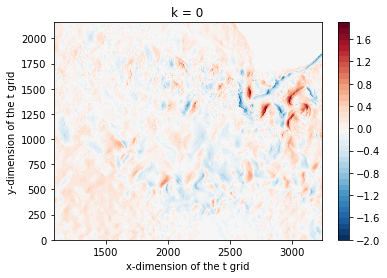

In [20]:
eulfiltered_v.isel(time=1).plot(x='i',levels=np.arange(-2,2,0.1))

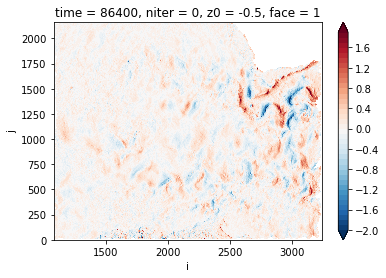

In [14]:
v_g.isel(time=1).plot(x='i',levels=np.arange(-2,2,0.1))

In [ ]:
(eulfiltered_v.isel(time=1)-v_g.isel(time=1)).plot(x='i',levels=np.arange(-2,2,0.1))

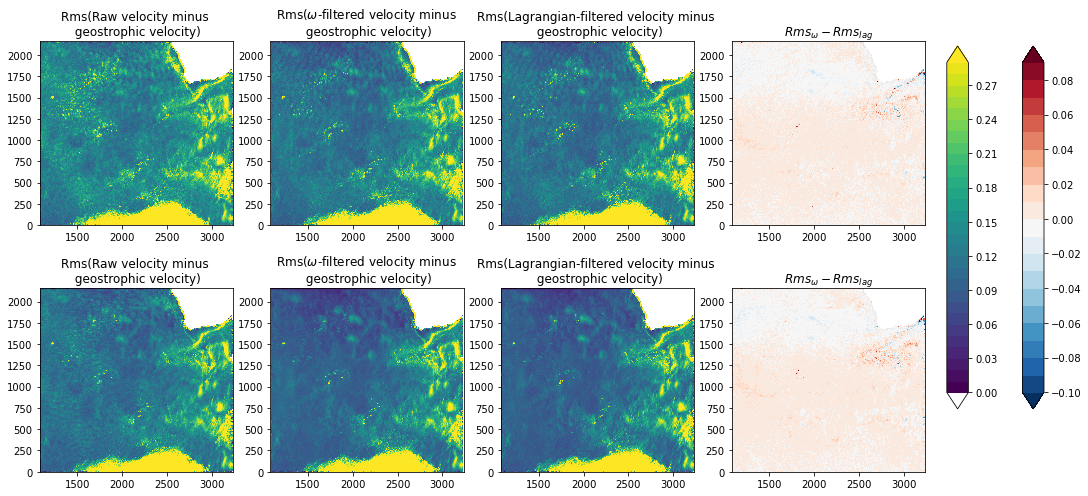

In [21]:
plt.rcParams.update({'font.size': 10})

plt.figure(figsize=(15,7))

plt.subplot(241)
rms_unfiltered.plot(x='i',levels=np.arange(0,0.3,0.01),add_colorbar=False)
plt.title('Rms(Raw velocity minus \n geostrophic velocity)')
plt.xlabel('')
plt.ylabel('')

plt.subplot(242)
rms_eulfiltered.plot(x='i',levels=np.arange(0,0.3,0.01),add_colorbar=False)
plt.title('Rms($\omega$-filtered velocity minus \n geostrophic velocity)')
plt.xlabel('')
plt.ylabel('')

plt.subplot(243)
rms_filtered.plot(x='i',levels=np.arange(0,0.3,0.01),add_colorbar=False)
plt.title('Rms(Lagrangian-filtered velocity minus \n geostrophic velocity)')
plt.xlabel('')
plt.ylabel('')

plt.subplot(244)
cs = (rms_eulfiltered - rms_filtered).plot(x='i',levels=np.arange(-0.1,0.1,0.01),add_colorbar=False)
plt.title('$Rms_{\omega} - Rms_{lag}$')
plt.xlabel('')
plt.ylabel('')

plt.subplot(245)
rms_unfiltered2.plot(x='i',levels=np.arange(0,0.3,0.01),add_colorbar=False)
plt.title('Rms(Raw velocity minus \n geostrophic velocity)')
plt.xlabel('')
plt.ylabel('')

plt.subplot(246)
rms_eulfiltered2.plot(x='i',levels=np.arange(0,0.3,0.01),add_colorbar=False)
plt.title('Rms($\omega$-filtered velocity minus \n geostrophic velocity)')
plt.xlabel('')
plt.ylabel('')

plt.subplot(247)
cs = rms_filtered2.plot(x='i',levels=np.arange(0,0.3,0.01),add_colorbar=False)
plt.title('Rms(Lagrangian-filtered velocity minus \n geostrophic velocity)')
plt.xlabel('')
plt.ylabel('')

plt.subplot(248)
cs2 = (rms_eulfiltered2 - rms_filtered2).plot(x='i',levels=np.arange(-0.1,0.1,0.01),add_colorbar=False)
plt.title('$Rms_{\omega} - Rms_{lag}$')
plt.xlabel('')
plt.ylabel('')

fig=plt.gcf()
plt.tight_layout()
fig.subplots_adjust(right=0.86)
cbar_ax = fig.add_axes([0.88, 0.18, 0.02, 0.72])
fig.colorbar(cs, cax=cbar_ax,extend='both')

cbar_ax2 = fig.add_axes([0.95, 0.18, 0.02, 0.72])
fig.colorbar(cs2, cax=cbar_ax2,extend='both')
fig = plt.gcf()
fig.savefig("rms_geostrophy_v.png")

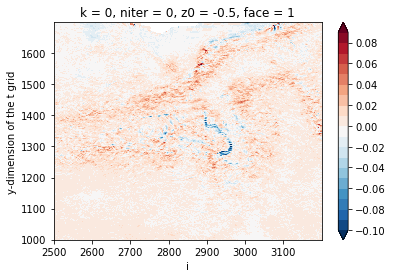

In [110]:
(rms_eulfiltered - rms_filtered).isel(i=slice(1420,2120),j=slice(1000,1700)).plot(x='i',levels=np.arange(-0.1,0.1,0.01))

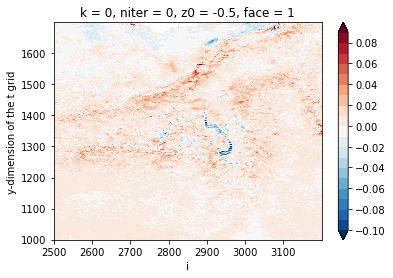

In [116]:
(rms_eulfiltered2 - rms_filtered2).isel(i=slice(1420,2120),j=slice(1000,1700)
                                       ).plot(x='i',levels=np.arange(-0.1,0.1,0.01))

In [65]:
last_time = 70
((((filtered_u.isel(time=slice(0,last_time),i=slice(850,-850),j=slice(920,-920)) -
            u_g.isel(time=slice(0,last_time),i=slice(850,-850),j=slice(920,-920)))**2).mean())**0.5).values

array(0.1310279)

In [43]:
((((eulfiltered_u.isel(time=slice(0,last_time),i=slice(850,-850),j=slice(920,-920)) -
            u_g.isel(time=slice(0,last_time),i=slice(850,-850),j=slice(920,-920)))**2).mean())**0.5).values

array(0.13127059)

In [69]:
((((filtered_u.isel(time=slice(0,last_time),i=slice(0,850),j=slice(920,-920)) -
            u_g.isel(time=slice(0,last_time),i=slice(0,850),j=slice(920,-920)))**2).mean())**0.5).values

array(0.14937303)

In [70]:
((((eulfiltered_u.isel(time=slice(0,last_time),i=slice(0,850),j=slice(920,-920)) -
            u_g.isel(time=slice(0,last_time),i=slice(0,850),j=slice(920,-920)))**2).mean())**0.5).values

array(0.15360045)

In [89]:
((((filtered_u.isel(time=slice(0,last_time),i=slice(0,850),j=slice(920,-920)) -
            ufilt_g.isel(time=slice(0,last_time),i=slice(0,850),j=slice(920,-920)))**2).mean())**0.5).values

array(0.13107306)

In [90]:
((((eulfiltered_u.isel(time=slice(0,last_time),i=slice(0,850),j=slice(920,-920)) -
            ufilt_g.isel(time=slice(0,last_time),i=slice(0,850),j=slice(920,-920)))**2).mean())**0.5).values

array(0.13582058)

In [112]:
((((filtered_u.isel(time=slice(0,last_time),i=slice(1420,2120),j=slice(1000,1700)) -
            ufilt_g.isel(time=slice(0,last_time),i=slice(1420,2120),j=slice(1000,1700)))**2).mean())**0.5).values

array(0.17769953)

In [113]:
((((eulfiltered_u.isel(time=slice(0,last_time),i=slice(1420,2120),j=slice(1000,1700)) -
            ufilt_g.isel(time=slice(0,last_time),i=slice(1420,2120),j=slice(1000,1700)))**2).mean())**0.5).values

array(0.18102518)

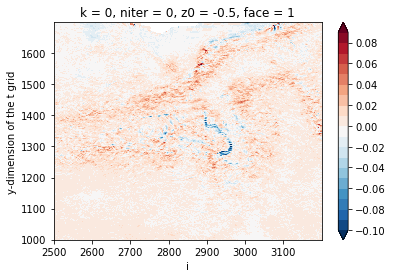

In [111]:
(rms_eulfiltered - rms_filtered).isel(i=slice(1420,2120),j=slice(1000,1700)
                                     ).plot(x='i',levels=np.arange(-0.1,0.1,0.01))

In [104]:
((((filtered_u.isel(time=slice(0,last_time)).sel(i=slice(2500,3200),j=slice(1000,1700)) -
            ufilt_g.isel(time=slice(0,last_time)).sel(i=slice(2500,3200),j=slice(1000,1700)))**2).mean())**0.5).values

ValueError: arguments without labels along dimension 'i' cannot be aligned because they have different dimension size(s) {0} than the size of the aligned dimension labels: 701

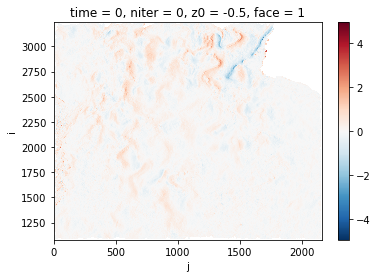

In [185]:
u_g.isel(time=0).plot()

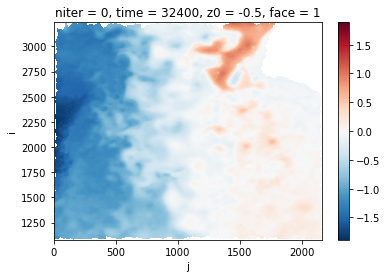

In [186]:
unfiltered_eta.isel(time=10).plot()